In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Booli_sold.csv")

In [3]:
df.loc[:, "PPSM"] = (df["soldPrice"]/df["livingArea"]).round()

In [4]:
relevant_df = df[["soldPrice", "livingArea", "location.address.streetAddress", "location.distance.ocean", "constructionYear", "floor", "PPSM"]]

In [5]:
#ppsm_sorted_df = relevant_df.sort_values("PPSM", ascending = False)
sorted_df = relevant_df.sort_values("PPSM", ascending = False)
sorted_df.head(5)

,soldPrice,livingArea,location.address.streetAddress,location.distance.ocean,constructionYear,floor,PPSM
67,2500000,24.0,Ekhagsvägen 8,161,1935.0,3.0,104167.0
50,2450000,24.0,Ekhagsvägen 8,161,1935.0,3.0,102083.0
54,2300000,23.0,Ekhagsvägen 10,135,1935.0,1.0,100000.0
34,2210000,25.0,Torphagsvägen 4,218,1936.0,0.0,88400.0
55,2300000,26.9,Docentbacken 1B,298,1968.0,2.0,85502.0


In [6]:
filtered_df = sorted_df.dropna(subset = "PPSM")

In [7]:
#print(filtered_df["soldPrice"].sum()/filtered_df["livingArea"].sum())
print(filtered_df["PPSM"].sum()/len(filtered_df))

58759.388535031845


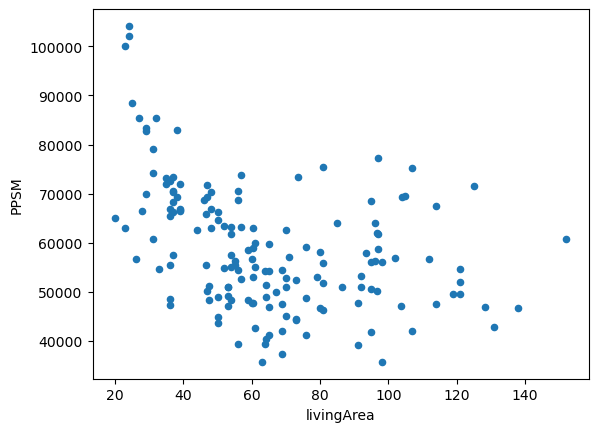

In [8]:
plot1 = sorted_df.plot.scatter("livingArea", "PPSM")

In [ ]:
# relevant_df["PPSM"] = relevant_df.loc[["",""]].apply(lambda x: x[col_1]/x[col_2])

In [9]:
df2 = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/2018_R_per_kommun.csv", sep = ";", decimal = ",")

In [10]:
filtered_df2 = df2.loc[df2["LÄNSNAMN"] == "Stockholms län"] 
grouped_df2 = filtered_df2.groupby("LÄNSNAMN").sum("RÖSTERGILTIGA")
relevant_df2 = grouped_df2[["RÖSTER GILTIGA"]]
relevant_df2

,RÖSTER GILTIGA
LÄNSNAMN,
Stockholms län,1426237


In [11]:
soc_df = df2.sort_values("S", ascending = False)
soc_df.head(1)

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
188,17,62,Värmlands län,Munkfors,8.33,8.12,2.91,3.93,52.18,6.11,...,NaN,NaN,NaN,NaN,1.02,NaN,2340,2364,2777,85.13


In [18]:
df2.loc[:, "VALDELTAGANDE"] = (df2["RÖSTANDE"]/df2["RÖSTBERÄTTIGADE"]).round(3)
turnout_df2 = df2[["KOMMUNNAMN", "RÖSTANDE", "RÖSTBERÄTTIGADE", "VALDELTAGANDE"]]

#turnout = (df2["RÖSTANDE"]/df2["RÖSTBERÄTTIGADE"]).round(3)
#turnout_df2.loc[:, "VALDELTAGANDE"] = turnout

turnout_df2.sort_values("VALDELTAGANDE", ascending = False).head(3)

,KOMMUNNAMN,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
103,Lomma,16492,17570,0.939
59,Habo,7825,8382,0.934
98,Vellinge,25360,27231,0.931


In [51]:
df3 = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")

In [78]:
stroke1_df = df3.loc[df3["stroke"] == 1] 
stroke0_df = df3.loc[df3["stroke"] == 0]
